# Product Recommendation Systems

### Domain - E-commerce

## Context - 
Everyday a million products are being recommended to users based on popularity and other metrics on e-commerce websites. The most popular e-commerce website boosts average order value by 50%, increases revenues by 300%, and improves conversion. In addition to being a powerful tool for increasing revenues, product recommendations are so essential that customers now expect to see similar features on all other eCommerce sites.

### Data Description -
Data columns- First three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

### Source - 
Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has several datasets. For this case study, we are using the Electronics dataset.

### Learning Outcomes -
    ● Exploratory Data Analysis
    ● Data Wrangling
    ● Build a Popularity recommender model
    ● Build Collaborative Filtering model

### Objective - 
To make a recommendation system that recommends at least five(5) new products based on the user's habits.

## Steps and tasks -
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics) ( 3 Marks)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) -(5 Marks)
3. Build Popularity Recommender model. ( 15 marks)
4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks)
5. Build Collaborative Filtering model. ( 20 marks)
6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. ( 5 marks)
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. ( 10 marks)
8. Summarise your insights. ( 10 marks)

### Please Note -
● If you are facing any memory issue while working on this project, create a small subset (Let’s say 10% of data) and work on it.
● If you are stuck at the model evaluation part of this project.
Please refer to below links -
1. https://surprise.readthedocs.io/en/stable/accuracy.html
2. http://surpriselib.com/ - Getting started, example

In [220]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics) ( 3 Marks)

In [221]:
# Reading the dataset
data = pd.read_csv("ratings_Electronics.csv", names=['userID', 'productID', 'ratings', 'timestamp'])
data.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [222]:
# Dropping timestamp column as it may not be useful for this exercise
data.drop('timestamp', axis=1, inplace=True)
data.head()

,userID,productID,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [223]:
# The dataset has 7.8 M rows and 3 columns which is huge
data.shape

(7824482, 3)

In [224]:
# Ratings value is between 1 and 5
# Median ratings are 5, and mean of the ratings is around 4.01
data.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [225]:
# The dataset is huge and occupies more than 179 MB memory. It will take lot of time to load the data and do any filtering
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [226]:
# Around 4.2 Million unique user IDs are present in the dataset
data.userID.nunique()

4201696

In [227]:
# Around 476 Thousand unique product IDs are present in the dataset
data.productID.nunique()

476002

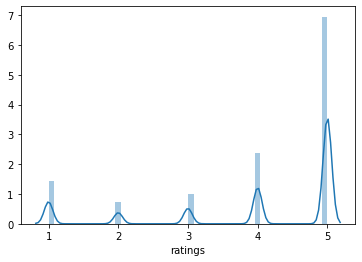

In [228]:
sns.distplot(data['ratings'])

(array([ 901765.,  456322.,  633073., 1485781., 4347541.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

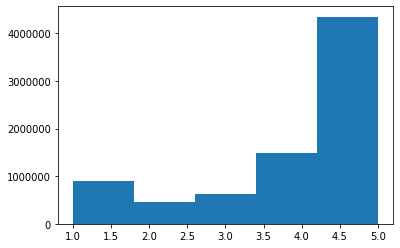

In [229]:
# Clearly most people have rated the products as 5 which is why the median of the ratings is 5 and mean is 4.01
plt.hist(data['ratings'], bins=5)

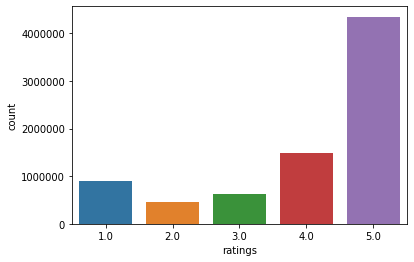

In [230]:
sns.countplot(data['ratings'])

In [231]:
data.ratings.unique()

array([5., 1., 3., 2., 4.])

#### Insights
Clearly most people have rated the products as 5 which is why the median of the ratings is 5 and mean is 4.01


## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) -(5 Marks)


In [232]:
# Checking the number of ratings each user has given
ratings_count = data['userID'].value_counts()
ratings_count.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userID, dtype: int64

In [233]:
# Creating new dataset including only the users who have rated more than 50 products
new_data = data[data['userID'].isin(ratings_count[ratings_count>50].index)]

In [234]:
# The dataset is reduced from 7.8 M rows to only 122 Thousand rows
new_data.shape

(122171, 3)

In [235]:
new_data.head()

,userID,productID,ratings
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0


## 3. Build Popularity Recommender model. ( 15 marks)

In [236]:
# Grouping the data with productID and aggregating using Average rating 
pop_mean = pd.DataFrame(new_data.groupby('productID').agg('mean').reset_index())

# Sorting by ratings
pop_mean.sort_values('ratings', ascending=False, inplace=True)

# Renaming the ratings column name to AvgRating
pop_mean.rename(columns={'ratings': 'AvgRating'}, inplace=True)
pop_mean.head()

,productID,AvgRating
47154,B00LKG1MC8,5.0
18649,B001UE6HZ2,5.0
18704,B001UKJ8FC,5.0
18703,B001UK6UO4,5.0
37782,B0082N9DGY,5.0


In [237]:
# Grouping the data with productID and aggregating using rating count
pop_count = pd.DataFrame(new_data.groupby('productID').agg('count').reset_index(), columns=['productID', 'ratings'])

# Sorting by ratings
pop_count.sort_values('ratings', ascending=False, inplace=True)

# Renaming the ratings column name to RatingCount
pop_count.rename(columns={'ratings': 'RatingCount'}, inplace=True)
pop_count.head()

,productID,RatingCount
38146,B0088CJT4U,204
24262,B003ES5ZUU,177
10820,B000N99BBC,163
37407,B007WTAJTO,156
37765,B00829TIEK,146


In [238]:
# Merging the 2 dataframes to have AvgRating and RatingCount in the same dataframe
pop_data = pop_mean.merge(pop_count).sort_values('RatingCount', ascending=False)
pop_data.head()

,productID,AvgRating,RatingCount
27683,B0088CJT4U,4.215686,204
21134,B003ES5ZUU,4.858757,177
21619,B000N99BBC,4.773006,163
22200,B007WTAJTO,4.692308,156
25983,B00829TIEK,4.431507,146


In [239]:
# Calculating TotalRating for every product by multiplying AvgRating and RatingCount
pop_data['TotalRating'] = pop_data['AvgRating']*pop_data['RatingCount']

# Sorting the data based on TotalRating
pop_data.sort_values('TotalRating', ascending=False, inplace=True)
pop_data.head(10)

,productID,AvgRating,RatingCount,TotalRating
27683,B0088CJT4U,4.215686,204,860.0
21134,B003ES5ZUU,4.858757,177,860.0
21619,B000N99BBC,4.773006,163,778.0
22200,B007WTAJTO,4.692308,156,732.0
25983,B00829TIEK,4.431507,146,647.0
26099,B00829THK0,4.409091,132,582.0
28218,B008DWCRQW,4.088889,135,552.0
22641,B004CLYEDC,4.666667,117,546.0
28132,B002R5AM7C,4.118110,127,523.0
23110,B0034CL2ZI,4.628571,105,486.0


In [240]:
# Top 5 items in the pop_data are the highest rated products
print('Top 5 products based on Popularity Recommender systems are :\n', pop_data.productID.head(5))

Top 5 products based on Popularity Recommender systems are :
 27683    B0088CJT4U
21134    B003ES5ZUU
21619    B000N99BBC
22200    B007WTAJTO
25983    B00829TIEK
Name: productID, dtype: object


### Insights & Findings
- Only AvgRating or RatingCount may not give the correct measure of whether the product is popular or not. 
- Because there may be very few users who rated the product as 5 and it will make the AvgRating as 5 even though its not that popular
- Similarly lot of users might have rated a product as 1. So, the RatingCount is also not a good measure of a popular product.
- Multiplying AvgRating with RatingCount gives the sum of all user ratings. The sum of all user ratings for a particular product tells how popular the product is.
- We could have calculated the Total ratings directly while aggregating the data in the first step usint agg('sum'). However, these additional steps were taken to demonstrate the above findings.

## 4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks)

In [241]:
# Install the surprise library
!pip install surprise

In [242]:
# Import Dataset, Reader and train_test_split functions form the surprise library
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

In [243]:
# Load the dataframe into surprise dataset format 
sup_data = Dataset.load_from_df(new_data, reader)
sup_train_data, sup_test_data = train_test_split(sup_data, test_size= 0.3, random_state=1)

## 5. Build Collaborative Filtering model. ( 20 marks)

In [244]:
# Using KNNwithMeans algorithm from surprise library and accuracy to evaluate the model RMSE
from surprise import KNNWithMeans, accuracy

In [245]:
# User based collaborative model using KNN with means algorithm with pearson baseline as the similarity metric 
model = KNNWithMeans(k=10, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(sup_train_data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [246]:
# Getting predictions on test data
sup_test_pred = model.test(sup_test_data)
sup_test_pred

[Prediction(uid='A2XU6J41ZQOJ2V', iid='B005F25IL4', r_ui=5.0, est=4.454545454545454, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B008DWCRQW', r_ui=2.0, est=4.600489350939015, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='ALDAF4VVLFRHP', iid='B0015313Q6', r_ui=5.0, est=4.526785714285714, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3NOBH42C7UI5M', iid='B00AK8TVE8', r_ui=5.0, est=4.262561536032928, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3FEGTOLCWXSV4', iid='B00AR95ESC', r_ui=5.0, est=4.983819302364403, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='AIJQU979J6UFY', iid='B00829TIEK', r_ui=4.0, est=4.612405897314308, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A1PPS91NLI7KEH', iid='B007P4VOWC', r_ui=2.0, est=3.914285714285714, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AM3XN

## 6. Evaluate the above model ( 5 marks)
( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. 

In [247]:
# Get the Root mean square error 
print('User based Collaborative model: Test data')
accuracy.rmse(sup_test_pred, verbose=True)

User based Collaborative model: Test data
RMSE: 1.0502


1.050221041376752

## 7. Get top - K ( K = 5) recommendations. ( 10 marks)
Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. 

In [248]:
# Converting surprise dataset back to a Dataframe
sup_test_pred_df = pd.DataFrame(sup_test_pred)
sup_test_pred_df.head()

,uid,iid,r_ui,est,details
0,A2XU6J41ZQOJ2V,B005F25IL4,5.0,4.454545,"{'actual_k': 0, 'was_impossible': False}"
1,A25C2M3QF9G7OQ,B008DWCRQW,2.0,4.600489,"{'actual_k': 10, 'was_impossible': False}"
2,ALDAF4VVLFRHP,B0015313Q6,5.0,4.526786,"{'actual_k': 0, 'was_impossible': False}"
3,A3NOBH42C7UI5M,B00AK8TVE8,5.0,4.262562,"{'was_impossible': True, 'reason': 'User and/o..."
4,A3FEGTOLCWXSV4,B00AR95ESC,5.0,4.983819,"{'actual_k': 4, 'was_impossible': False}"


In [249]:
# Recommend 5 products for a given random user

user_id = sup_test_pred_df.sample(random_state=1)['uid'].item()
print('Product Recommendations for user id :', user_id)

sup_test_pred_df[sup_test_pred_df['uid'] == user_id][['iid', 'r_ui', 'est']].sort_values(by='r_ui', ascending=False).head(5)

Product Recommendations for user id : A3OXHLG6DIBRW8


,iid,r_ui,est
129,B001TH7GVE,5.0,4.736689
13058,B002CMAW20,5.0,4.451515
23011,B000EOPQ7E,5.0,4.247042
22904,B00HJ1NQLS,5.0,4.584654
22396,B006FLENJC,5.0,4.883989


## 8. Summarise your insights. ( 10 marks)

1. When building Popularity recommender system, the userID column was completely ignored, which means every user will get the same top 5 recommendations. 
2. Product ID B0088CJT4U and B003ES5ZUU are the highest rated products by number of users and total ratings given. These are recommended as the top 2 for every user when using a Popularity recommendation system. 
3. Collaborative recommendation systems give personalized product recommendations for every user which is clear by running the below code.

In [250]:
# Select 3 random sample users from the test data
users = sup_test_pred_df.sample(3)['uid']

# Iterate over the users and print their personalized product recommendations
for i in range(0,len(users)):
    user_id = users.iloc[i]
    # print(user_id)    
    print('Product Recommendations for user id :', user_id)
    print(sup_test_pred_df[sup_test_pred_df['uid'] == user_id][['iid', 'r_ui', 'est']].sort_values(by='r_ui', ascending=False).head(5))

Product Recommendations for user id : A1ODOGXEYECQQ8
              iid  r_ui       est
18965  B0041OSQ9I   5.0  4.657334
9309   B000UXDHNY   5.0  4.332090
10422  B0000A0AJH   5.0  4.332090
22087  B00A35WYBA   5.0  4.332090
29244  B00AKONZ3U   5.0  4.487548
Product Recommendations for user id : A17HMM1M7T9PJ1
              iid  r_ui       est
455    B004M8ST5Y   5.0  5.000000
7956   B00GVX0HCG   5.0  4.262562
34567  B004KMC0SO   5.0  4.383178
33899  B00123Q8YQ   5.0  4.262562
30023  B004QK7HI8   5.0  5.000000
Product Recommendations for user id : A87N6UTYA6NOB
              iid  r_ui       est
4160   B003XZSZWO   5.0  4.280702
18772  B003PSSLJG   5.0  4.262562
34344  B0018O9JIG   5.0  4.847712
32272  B001TH7T2U   5.0  4.652130
30845  B0033Z74L2   5.0  4.262562
